In [9]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("../../bin/imports.ipynb")

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [10]:
def get_values_from_df(df):
    values = []
    for a in df.values:
        values.extend(a)
    return values

In [11]:
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.cancer.TCGA.conservative.mut.csv', index_col=0)
conserved_patients = list(df.index)
mutation_counts = pd.DataFrame(df.sum()).reset_index()
mutation_counts.columns = ['mutation', 'count']
driver_mutations = list(mutation_counts[mutation_counts['count'] > 10].mutation)
#driver_mutations = list(mutation_counts.mutation)
print len(driver_mutations)
categories = ['oncogenes', 'tsgenes', 'random', 'germline', 'viral', 'bacterial']
value_types = []
for category in categories:
    # restrict the columns to higher frequency mutations
    if category == 'oncogenes' or category == 'tsgenes':
        df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/patient_matrices/{0}.all.csv'.format(category), index_col=0)
        #df.set_index('mutation', inplace=True)
        app_restricted_space = [x for x in driver_mutations if x in df.index]
        values = get_values_from_df(df.ix[app_restricted_space, conserved_patients])
        print category, len(values), len(df.index), len(app_restricted_space)
        value_types.append(values)
    else:
        df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/patient_matrices/{0}.all.csv'.format(category), index_col=0)
        #df.set_index('mutation', inplace=True)
        df.ix[:, conserved_patients].dropna(axis=1)
        values = get_values_from_df(df)
        value_types.append(values)
        print category, len(values)
categories = ['Oncogenes', 'TSgenes', 'Random', 'Germline', 'Viral', 'Bacterial']
plotting = pd.DataFrame({'category': ['Oncogenes' for x in value_types[0]] + ['TSgenes' for x in value_types[1]] + ['Random' for x in value_types[2]] + ['Germline' for x in value_types[3]] + ['Viral' for x in value_types[4]] + ['Bacterial' for x in value_types[5]],
                         'PHBR': value_types[0] + value_types[1] + value_types[2] + value_types[3] + value_types[4] + value_types[5]})


72
oncogenes 231738 643 39
tsgenes 190144 602 32
random 21870000
germline 7290000
viral 7290000
bacterial 7290000


In [12]:
fraction = {}
for cat in categories:
    fraction[cat] = []
for x in np.arange(0, 31, 1):
    print x
    for cat in categories:
        fraction[cat].append(mean(plotting[plotting.category == cat].PHBR < x))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


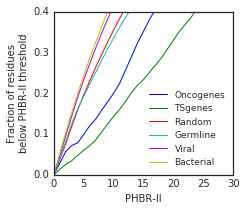

In [13]:
# with 10 cutoff threshold
plt.figure(figsize=(3.5, 3))
for cat in categories:
    plt.plot(np.arange(0, 31, 1), fraction[cat], label=cat)
plt.legend(loc=4)
plt.xlim(0, 30)
plt.ylim(0, 0.4)
plt.ylabel('Fraction of residues\nbelow PHBR-II threshold')
plt.xlabel('PHBR-II')
plt.locator_params(axis='y', nbins=6)
L = plt.legend(loc=4, prop={'size': 9})
plt.tight_layout()
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/class_comparison/patient.cdf.g10.conservative.pdf')

In [6]:
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.cancer.TCGA.conservative.mut.csv', index_col=0)
mutation_counts = pd.DataFrame(df.sum()).reset_index()
mutation_counts.columns = ['mutation', 'count']
#driver_mutations = list(mutation_counts[mutation_counts['count'] > 10].mutation)
driver_mutations = list(mutation_counts.mutation)
print len(driver_mutations)
categories = ['oncogenes', 'tsgenes', 'random', 'germline', 'viral', 'bacterial']
value_types = []
for category in categories:
    # restrict the columns to higher frequency mutations
    if category == 'oncogenes' or category == 'tsgenes':
        df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/patient_matrices/{0}.all.csv'.format(category), index_col=0)
        #df.set_index('mutation', inplace=True)
        app_restricted_space = [x for x in driver_mutations if x in df.index]
        values = get_values_from_df(df.ix[app_restricted_space, :])
        print category, len(values), len(df.index), len(app_restricted_space)
        value_types.append(values)
    else:
        df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/patient_matrices/{0}.all.csv'.format(category), index_col=0)
        #df.set_index('mutation', inplace=True)
        values = get_values_from_df(df)
        value_types.append(values)
        print category, len(values)
categories = ['Oncogenes', 'TSgenes', 'Random', 'Germline', 'Viral', 'Bacterial']
plotting = pd.DataFrame({'category': ['Oncogenes' for x in value_types[0]] + ['TSgenes' for x in value_types[1]] + ['Random' for x in value_types[2]] + ['Germline' for x in value_types[3]] + ['Viral' for x in value_types[4]] + ['Bacterial' for x in value_types[5]],
                         'PHBR': value_types[0] + value_types[1] + value_types[2] + value_types[3] + value_types[4] + value_types[5]})


1018
oncogenes 3732480 643 512
tsgenes 3550230 602 487
random 21870000
germline 7290000
viral 7290000
bacterial 7290000


In [7]:
fraction = {}
for cat in categories:
    fraction[cat] = []
for x in np.arange(0, 31, 1):
    print x
    for cat in categories:
        fraction[cat].append(mean(plotting[plotting.category == cat].PHBR < x))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


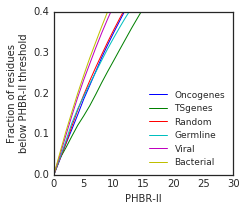

In [8]:
# with 10 cutoff threshold
plt.figure(figsize=(3.5, 3))
for cat in categories:
    plt.plot(np.arange(0, 31, 1), fraction[cat], label=cat)
plt.legend(loc=4)
plt.xlim(0, 30)
plt.ylim(0, 0.4)
plt.ylabel('Fraction of residues\nbelow PHBR-II threshold')
plt.xlabel('PHBR-II')
plt.locator_params(axis='y', nbins=6)
L = plt.legend(loc=4, prop={'size': 9})
plt.tight_layout()
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/class_comparison/patient.cdf.all_mutations.conservative.pdf')

## Other stuff

In [19]:
df = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/patient_affinities.cancer.PHBR.csv', index_col=0)
mutation_counts = pd.DataFrame(df.sum()).reset_index()
mutation_counts.columns = ['mutation', 'count']
#driver_mutations = list(mutation_counts[mutation_counts['count'] > 10].mutation)
driver_mutations = list(mutation_counts.mutation)
print len(driver_mutations)

1018


In [20]:
categories = ['oncogenes', 'tsgenes', 'random', 'germline', 'viral', 'bacterial']
value_typesI = []
for category in categories:
    # restrict the columns to higher frequency mutations
    if category == 'oncogenes' or category == 'tsgenes':
        df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/patient_matrices/{0}.all.csv'.format(category), index_col=0)
        #df.set_index('mutation', inplace=True)
        app_restricted_space = [x for x in driver_mutations if x in df.index]
        values = get_values_from_df(df.ix[app_restricted_space, :])
        print category, len(values), len(df.index), len(app_restricted_space)
        value_typesI.append(values)
    else:
        df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/patient_matrices/{0}.all.csv'.format(category), index_col=0)
        #df.set_index('mutation', inplace=True)
        values = get_values_from_df(df)
        value_typesI.append(values)
        print category, len(values)

oncogenes 3732480 643 512
tsgenes 3550230 602 487
random 21870000
germline 7290000
viral 7290000
bacterial 7290000


In [30]:
pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/

,TCGA-DH-A7UV,TCGA-DH-A7UT,TCGA-DH-A7UU,TCGA-DH-A7UR,TCGA-DH-A7US,TCGA-41-3915,TCGA-FP-A9TM,TCGA-DD-A4NA,TCGA-DD-A4NB,TCGA-B0-5088,...,TCGA-22-1002,TCGA-22-1000,TCGA-WB-A822,TCGA-86-A4P8,TCGA-22-1005,TCGA-XV-AB01,TCGA-LT-A8JT,TCGA-HD-8314,TCGA-FF-8046,TCGA-CU-A3KJ
mutation,,,,,,,,,,,,,,,,,,,,,
710127_A0PZW6_64,49.049705,29.510564,33.348544,35.517682,34.063434,27.881601,28.433870,26.253433,32.936014,29.585230,...,44.093556,34.849296,24.017482,38.084968,35.533922,39.485078,28.121579,31.495015,30.898811,33.035486
93061_Q6LP61_27,4.199523,3.877737,4.128686,3.513997,4.034945,4.163664,3.011134,3.017964,3.864290,3.717062,...,4.806742,5.317439,3.863958,3.817394,4.067877,5.797647,3.662370,3.028129,3.977848,3.105047
562_Q12394_70,2.592814,2.595606,2.485799,1.756583,3.450410,2.732427,1.782313,2.889051,2.196826,2.831339,...,2.175601,3.394690,1.631400,2.555010,2.618912,2.832359,2.924442,1.527151,3.803935,2.861505
90370_A6W385_73,28.919725,20.385866,30.210746,26.611772,24.864806,29.895607,31.241761,19.642247,28.484256,28.241870,...,29.577088,27.657710,24.586290,29.089446,24.335234,26.705243,24.621980,26.476012,22.225256,25.093192
272563_A0T0D9_669,3.980156,3.072566,2.383586,2.801826,2.482629,2.527747,3.416840,2.403266,2.517526,2.578902,...,3.645291,2.567148,3.277122,3.882708,2.233420,2.543412,2.145354,2.888889,2.348891,2.491128


In [21]:
categories = ['Oncogenes', 'TSgenes', 'Random', 'Germline', 'Viral', 'Bacterial']
plottingI = pd.DataFrame({'category': ['Oncogenes' for x in value_typesI[0]] + 
                          ['TSgenes' for x in value_typesI[1]] + ['Random' for x in value_typesI[2]] + 
                          ['Germline' for x in value_typesI[3]] + ['Viral' for x in value_typesI[4]] + 
                          ['Bacterial' for x in value_typesI[5]],
                         'PHBR': value_typesI[0] + value_typesI[1] + value_typesI[2] + 
                          value_typesI[3] + value_typesI[4] + value_typesI[5]})


In [26]:
fractionI = {}
for cat in categories:
    fractionI[cat] = []
for x in np.arange(0, 21, 0.5):
    print x
    for cat in categories:
        fractionI[cat].append(mean(plottingI[plottingI.category == cat].PHBR < x))

0.0
0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0
5.5
6.0
6.5
7.0
7.5
8.0
8.5
9.0
9.5
10.0
10.5
11.0
11.5
12.0
12.5
13.0
13.5
14.0
14.5
15.0
15.5
16.0
16.5
17.0
17.5
18.0
18.5
19.0
19.5
20.0
20.5


(0, 0.4)

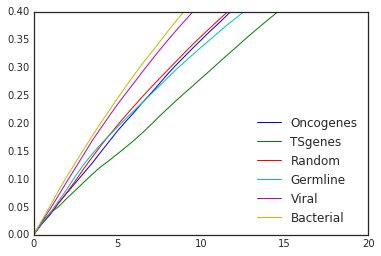

In [29]:
for cat in categories:
    plt.plot(np.arange(0, 21, 0.5), fractionI[cat], label=cat)
plt.legend(loc=4)
plt.xlim(0, 20)
plt.ylim(0, 0.4)